In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
class LDAModel:
    def __init__(self, df):
        self.df = df
    
    def train_lda(self, num_topics=10):
        # Leer el archivo CSV con las palabras de interés
        df_palabras_interesantes = pd.read_csv(self.df)
        
        # Obtener los documentos como una lista de strings
        documentos = df_palabras_interesantes['Palabra'].tolist()
        
        # Inicializar el vectorizador de conteo
        vectorizer = CountVectorizer()
        
        # Vectorizar los documentos
        X = vectorizer.fit_transform(documentos)
        
        # Inicializar el modelo LDA
        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        
        # Entrenar el modelo LDA
        lda_model.fit(X)
        
        # Obtener las palabras más representativas de cada tópico
        topics_words = []
        feature_names = vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(lda_model.components_):
            topic_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Tomar las 10 palabras más representativas de cada tópico
            topics_words.append(topic_words)
        
        return topics_words
    
    def visualize_topics(self, topics_words):
        # Crear un DataFrame con los tópicos y sus palabras asociadas
        df_topics = pd.DataFrame(topics_words, columns=[f"Tema {i+1}" for i in range(10)])
        
        # Crear la tabla visual con matplotlib
        plt.figure(figsize=(16, 9))
        plt.table(cellText=df_topics.values,
                colLabels=df_topics.columns,
                cellLoc='center',
                loc='center',
                colColours=['lightgray']*len(df_topics.columns),
                colWidths=[0.1]*len(df_topics.columns))
        
        # Ocultar ejes
        plt.axis('off')
        
        # Mostrar la tabla
        plt.show()

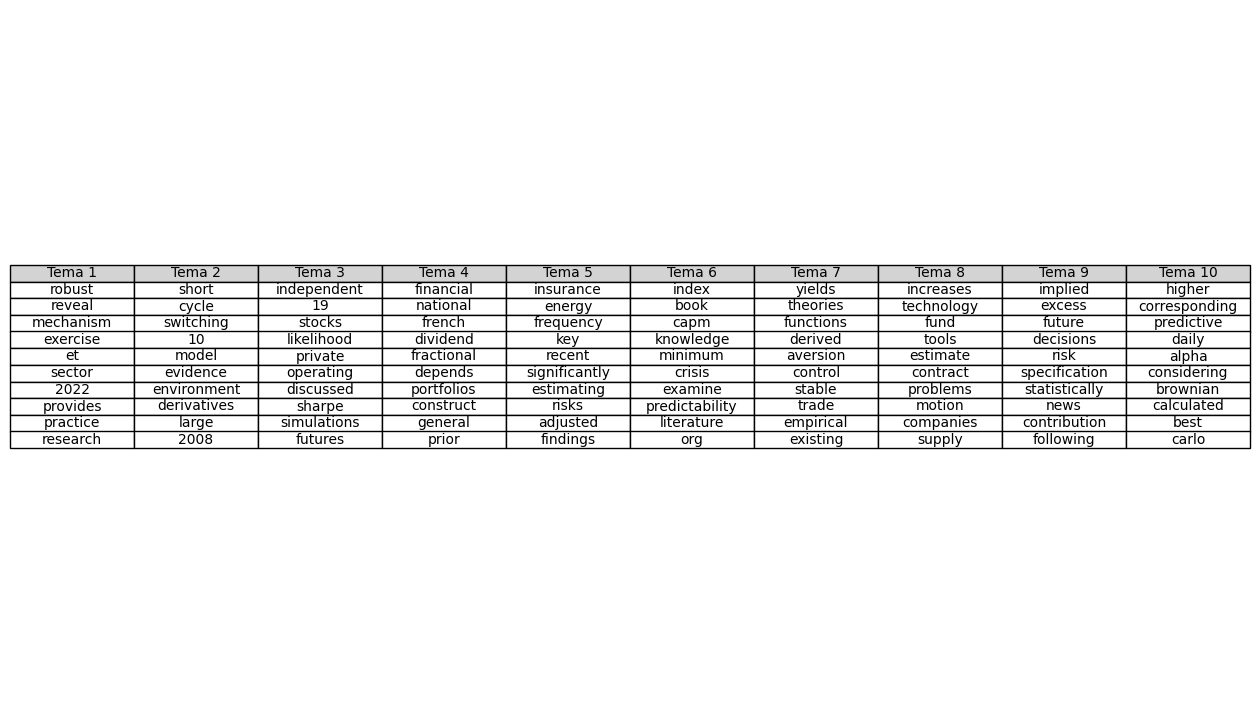

In [3]:
# Ruta del archivo CSV con las palabras de interés
archivo_palabras_interesantes = 'AssetPricingModelspalabras_interesantes.csv'

# Crear una instancia de la clase LDAModel
lda_modelo = LDAModel(archivo_palabras_interesantes)

# Obtener los 5 tópicos con sus palabras asociadas
topicos_palabras = lda_modelo.train_lda(num_topics=10)

# Visualizar los tópicos y sus palabras asociadas
lda_modelo.visualize_topics(topicos_palabras)